In [1]:
import sys
sys.path.insert(0, "../")
import os

from detectron2_extensions.config import get_cfg
from detectron2.data import get_detection_dataset_dicts

from detectron2_extensions.data.dataset_mapper import DatasetMapper
import vq2d.data

In [2]:
dataset_dicts = get_detection_dataset_dicts("vq2d_val_pos_frame_only_vc")

In [3]:
cfg = get_cfg()
cfg.merge_from_file("/scratch/shared/beegfs/prannay/ego4d_data/ckpt/perframe_run/config.yaml")

mapper = DatasetMapper(cfg, is_train=False)

In [58]:
file_names = [d['file_name'] for d in dataset_dicts]
target = [i for i, d in enumerate(file_names) if "d5935c29-1b8d-417d-9bbb-5ebd47e9256d/frame_0001733.png" in d][0]

In [59]:
target

103

In [60]:
dataset_dicts[target]['file_name']

'/scratch/shared/beegfs/prannay/ego4d_data/images_val/d5935c29-1b8d-417d-9bbb-5ebd47e9256d/frame_0001733.png'

In [61]:
output = mapper(dataset_dicts[target])

In [62]:
output.keys()

dict_keys(['file_name', 'height', 'width', 'image_id', 'image', 'reference'])

In [63]:
output['image'].max()

tensor(255, dtype=torch.uint8)

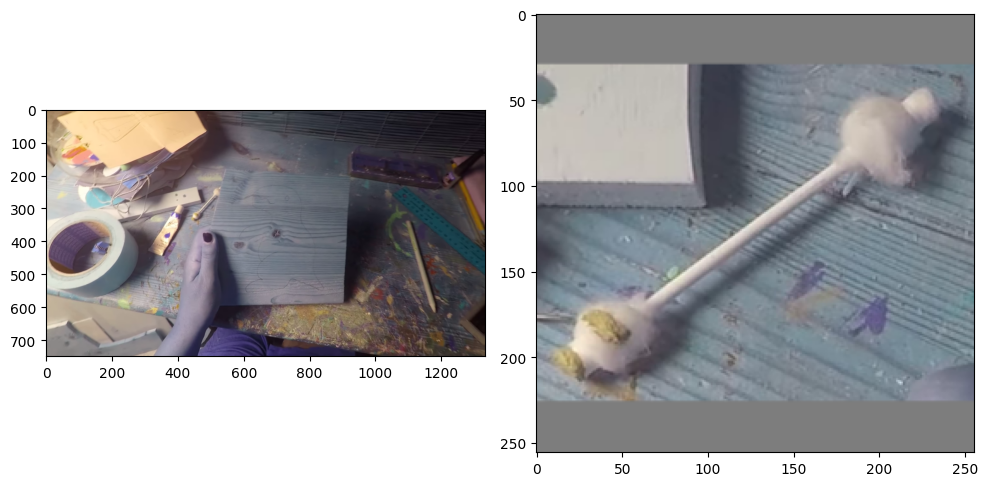

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(output['image'].permute(1, 2, 0).numpy())
ax[1].imshow(output['reference'].byte().permute(1, 2, 0).numpy())
plt.tight_layout()
plt.show()

In [69]:
print(output['image'].float().mean(dim=(1, 2)))
print(output['image'].float().std())

tensor([111.9959, 104.1674, 104.9336])
tensor(57.1324)
